In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io

In [5]:
RGB_image=io.imread('Cat_image.jpg')

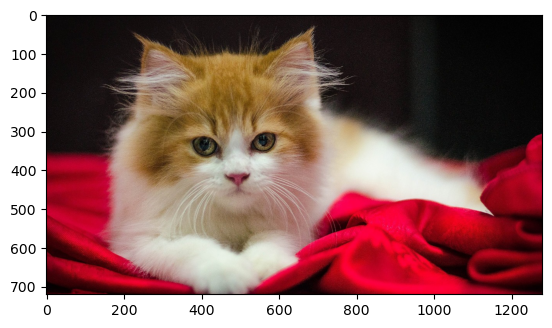

In [6]:
plt.imshow(rgb_image)

In [7]:
RGB_image.shape

(720, 1280, 3)

In [8]:
R=RGB_image[:, :, 0]
G=RGB_image[:, :, 1]
B=RGB_image[:, :, 2]

Build PCA

In [19]:
class PCA:
    def __init__(self,number_of_components=None):
        self.number_of_components=number_of_components
        self.components = None
        self.df_mean = None
        self.df_std = None
    def fit(self,df):
        #Standarixation
        self.df_mean=df.mean(axis=0)

        self.df_std=df.std(axis=0)
        
        self.standardized_df=(df-self.df_mean)/self.df_std

        #Get covariance matrix

        covariance_matrix=np.cov(self.standardized_df.T)

        #EigenValue,EigenVector
        
        EigenValues,EigenVectors=np.linalg.eig(covariance_matrix)

        #sort index
        sorted_ind = np.argsort(EigenValues)[::-1]
        self.components = EigenVectors[:, sorted_ind[:self.number_of_components]]
        print(f'Shape of Components is {self.components.shape}')
    def transform(self,df):
        standardized_df = (df - self.df_mean) / self.df_std
        return np.dot(standardized_df, self.components) 
    def inverse_transform(self,df):
        return np.dot(df , self.components.T) + self.df_mean
        

In [20]:
PCA_R=PCA(number_of_components=20)
standardized_R=(R-R.mean(axis=0))/R.std(axis=0)
PCA_R.fit(standardized_R)
compress_R=PCA_R.transform(standardized_R)

Shape of Components is (1280, 20)


In [21]:
PCA_G=PCA(number_of_components=20)
standardized_G=(G-G.mean(axis=0))/G.std(axis=0)
PCA_G.fit(standardized_G)
compress_G=PCA_G.transform(standardized_G)

Shape of Components is (1280, 20)


In [22]:
PCA_B=PCA(number_of_components=20)
standardized_B=(B-B.mean(axis=0))/B.std(axis=0)
PCA_B.fit(standardized_B)
compress_B=PCA_B.transform(standardized_B)

Shape of Components is (1280, 20)


In [23]:
compressed_RGB_Image = np.stack([compress_R, compress_G, compress_B], axis=2)

In [24]:
compressed_RGB_Image.shape

(720, 20, 3)

In [25]:
Recons_R=PCA_R.inverse_transform(compress_R)
Recons_G=PCA_G.inverse_transform(compress_G)
Recons_B=PCA_B.inverse_transform(compress_B)

In [26]:
reconstructed_RGB_Image=np.stack([Recons_R,Recons_G,Recons_B],axis=2)

In [27]:
reconstructed_RGB_Image.shape

(720, 1280, 3)

C:\Users\Lab Tech\AppData\Local\Temp\ipykernel_27448\1016454324.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  plt.imshow(reconstructed_RGB_Image.astype(float))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


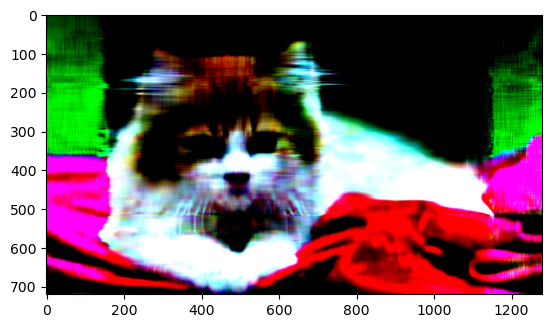

In [28]:
plt.imshow(reconstructed_RGB_Image.astype(float))

In [29]:
Eigen_face=np.load('olivetti_faces.npy')

In [30]:
Eigen_face.shape

(400, 64, 64)

In [31]:
Eigen_face=Eigen_face.copy().reshape(Eigen_face.shape[0],Eigen_face.shape[1]*Eigen_face.shape[2])

In [32]:
Eigen_face.shape

(400, 4096)

In [33]:
PCA_Eigen_face=PCA(number_of_components=40)

In [34]:
PCA_Eigen_face.fit(Eigen_face)

Shape of Components is (4096, 40)


In [35]:
compressed_image = PCA_Eigen_face.transform(Eigen_face)

In [36]:
Recons = PCA_Eigen_face.inverse_transform(compressed_image)

In [37]:
compressed_image.shape

(400, 40)

In [38]:
Recons.shape

(400, 4096)

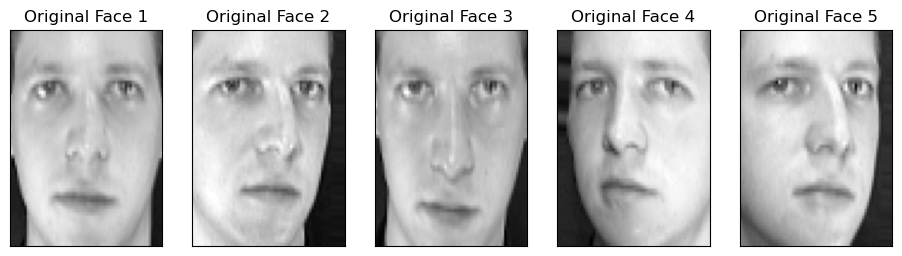

In [40]:
n_col,n_row=5,1
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.title("Original Face %s" % str(i + 1))
    plt.imshow(Eigen_face[i].reshape(64, 64), cmap='gray', aspect='auto')
    plt.xticks(())
    plt.yticks(())
plt.show()

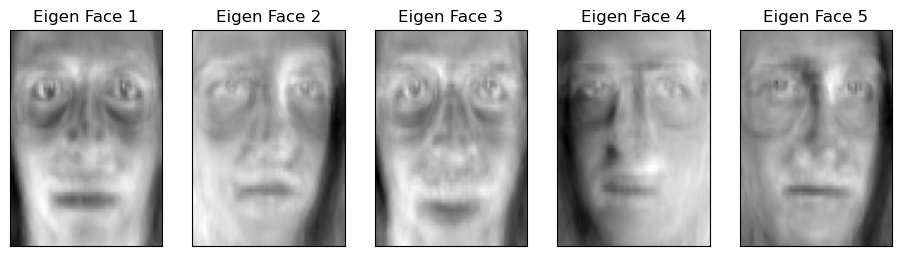

In [42]:
plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(n_row * n_col):
    plt.subplot(n_row, n_col, i + 1)
    plt.title("Eigen Face %s" % str(i + 1))
    plt.imshow(Recons[i].real.reshape(64, 64), cmap='gray', aspect='auto')
    plt.xticks(())
    plt.yticks(())
plt.show()